# TekCollection Test Harness  
### Thomas Ales | June 2020  
-----
Testing for TekCollection functionality.

In [1]:
import MapCollection

import matplotlib.pyplot as plt

In [2]:
data_dirs = [r'C:\Users\tka\source\repos\data\customer042\Cutset\000', r'C:\Users\tka\source\repos\data\customer042\Cutset\020', r'C:\Users\tka\source\repos\data\customer042\Cutset\040', r'C:\Users\tka\source\repos\data\customer042\Cutset\060', r'C:\Users\tka\source\repos\data\customer042\Cutset\080', r'C:\Users\tka\source\repos\data\customer042\Cutset\100',
r'C:\Users\tka\source\repos\data\customer042\Cutset\120', r'C:\Users\tka\source\repos\data\customer042\Cutset\140',
r'C:\Users\tka\source\repos\data\customer042\Cutset\160']

In [3]:
test_collection = MapCollection.TekCollection(data_dirs, '')

In [4]:
test_collection.add_map()

Loading 11 & 11 DC / RF Files
Loading 11 & 11 DC / RF Files
Loading 11 & 11 DC / RF Files
Loading 11 & 11 DC / RF Files
Loading 11 & 11 DC / RF Files
Loading 11 & 11 DC / RF Files
Loading 11 & 11 DC / RF Files
Loading 11 & 11 DC / RF Files
Loading 11 & 11 DC / RF Files


In [5]:
angles = ["0", "20", "40", "60", "80", "100", "120", "140", "160"]

Processing Angle 0
Angle 0 DC assembly completed...
Angle 0 FFT assembly completed...
Angle 0 velocity map assembly completed...
Angle 0 RF Peak Voltage assembly completed...
Processing Angle 20
Angle 1 DC assembly completed...
Angle 1 FFT assembly completed...
Angle 1 velocity map assembly completed...
Angle 1 RF Peak Voltage assembly completed...
Processing Angle 40
Angle 2 DC assembly completed...
Angle 2 FFT assembly completed...
Angle 2 velocity map assembly completed...
Angle 2 RF Peak Voltage assembly completed...
Processing Angle 60
Angle 3 DC assembly completed...
Angle 3 FFT assembly completed...
Angle 3 velocity map assembly completed...
Angle 3 RF Peak Voltage assembly completed...
Processing Angle 80
Angle 4 DC assembly completed...
Angle 4 FFT assembly completed...
Angle 4 velocity map assembly completed...
Angle 4 RF Peak Voltage assembly completed...
Processing Angle 100
Angle 5 DC assembly completed...
Angle 5 FFT assembly completed...
Angle 5 velocity map assembly com

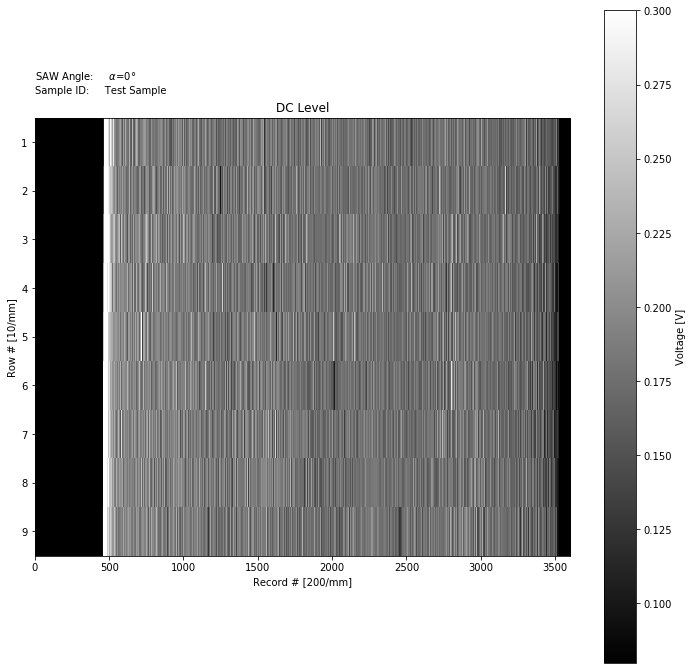

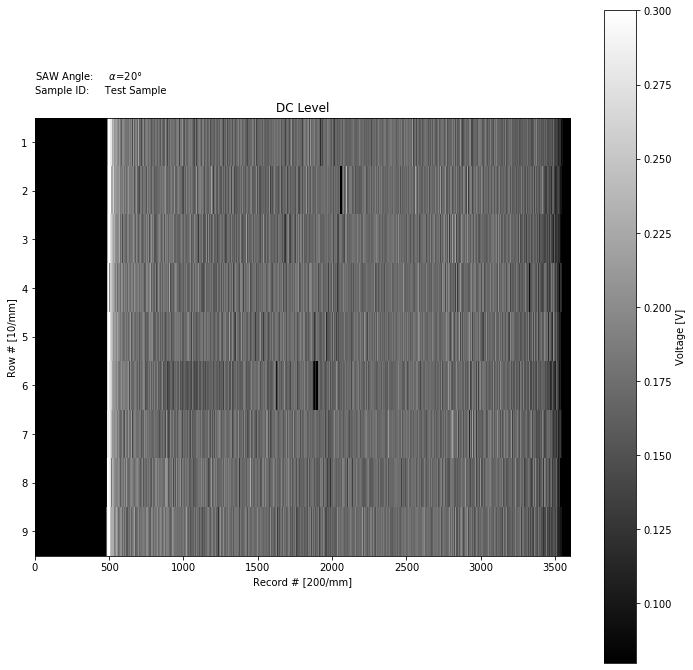

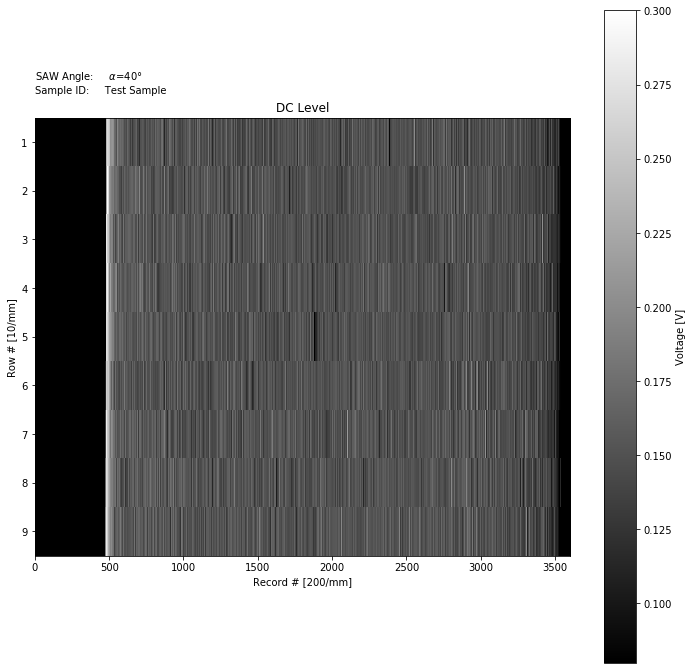

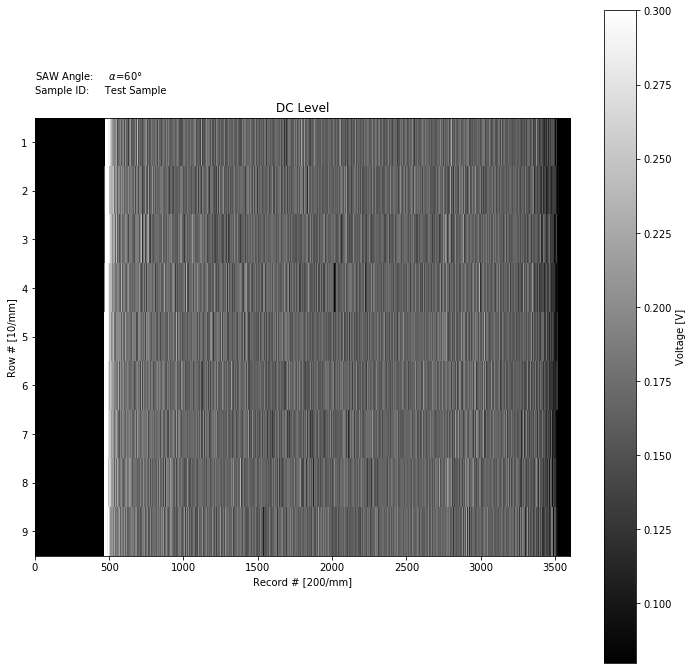

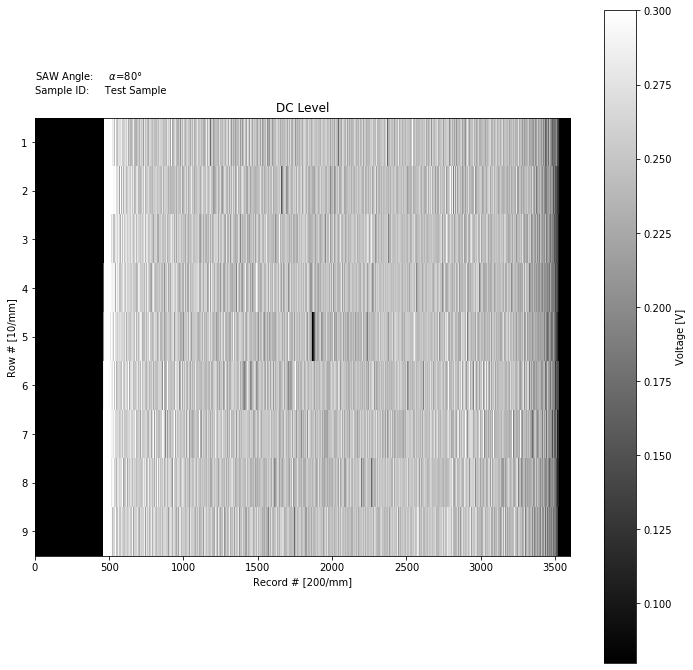

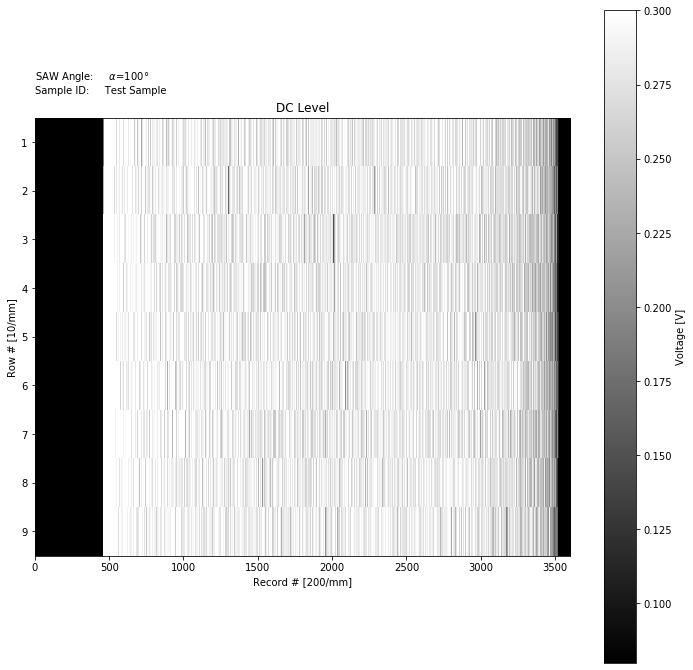

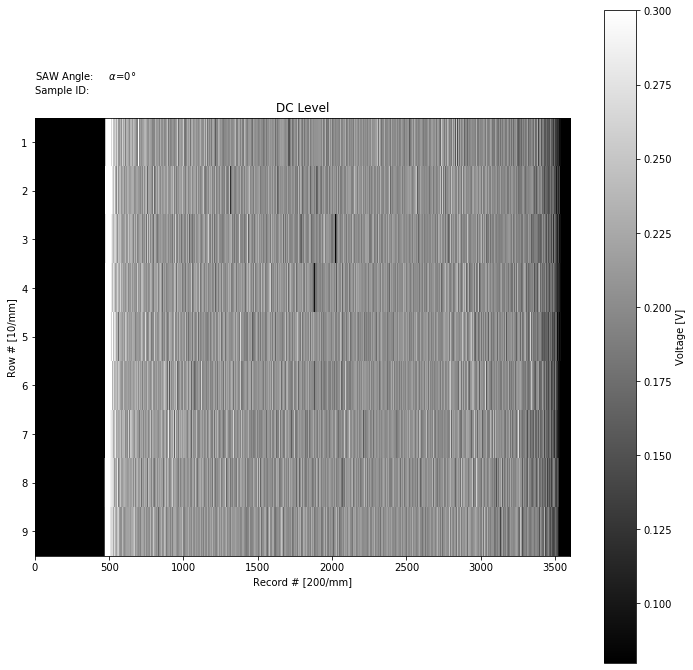

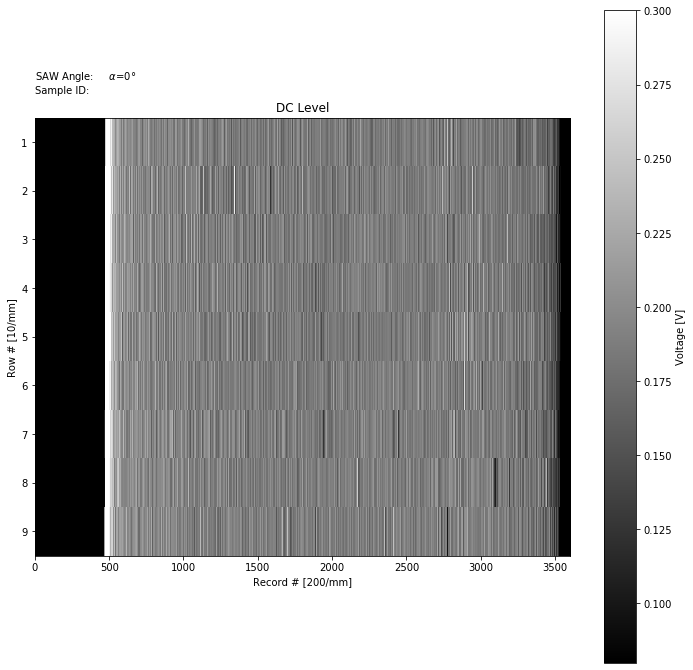

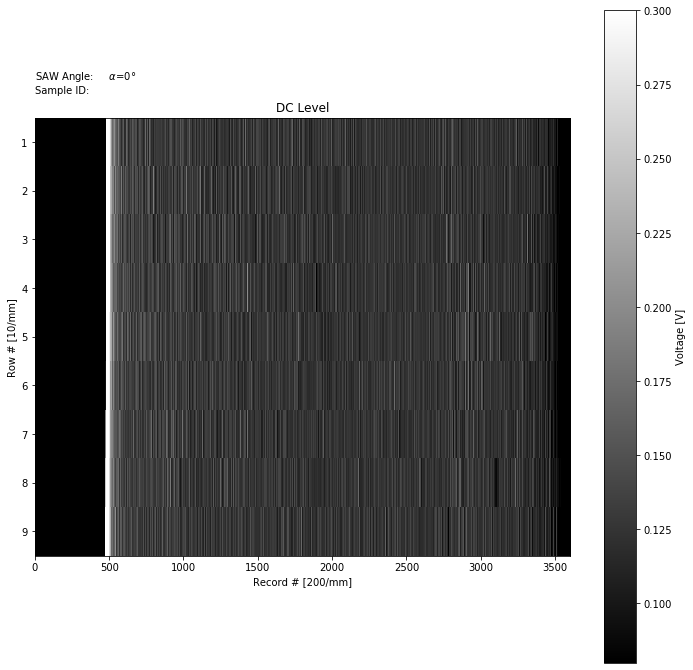

In [6]:
# fix metadata
for idx, angle in enumerate(range(0, 101, 20)):
    test_collection.map_collections[idx].metadata["acq_angle"] = angle
    test_collection.map_collections[idx].metadata["sample_desc"] = "Test Sample"

for current in range(0, angles.__len__()):
    print("Processing Angle {0}".format(angles[current]))
    test_collection.map_collections[current].assemble_dcmap()
    print("Angle {0} DC assembly completed...".format(current))
    test_collection.map_collections[current].assemble_fftmap()
    print("Angle {0} FFT assembly completed...".format(current))
    test_collection.map_collections[current].assemble_velocitymap()
    print("Angle {0} velocity map assembly completed...".format(current))
    test_collection.map_collections[current].assemble_rf_voltagemap()
    print("Angle {0} RF Peak Voltage assembly completed...".format(current))
for current in range(0, test_collection.map_collections.__len__()):
    test_collection.map_collections[current].plot_dcmap()

    

In [7]:
import pandas as pd
# Extract a few test pixels
wavespeeds = []
voltages = []
dcdf = []
vdf = []
startpoint = 1000
endpoint = 1010
for angle in range(0, test_collection.map_collections.__len__()):
    _dcmdf = pd.DataFrame(test_collection.map_collections[angle].dc_map)
    dcdf.append(_dcmdf)
    _veldf = pd.DataFrame(test_collection.map_collections[angle].velocity_map)
    vdf.append(_veldf)
    voltages.append(_dcmdf.iloc[:, startpoint:endpoint])
    wavespeeds.append(_veldf.iloc[:, startpoint:endpoint])

In [8]:
speeds = []
voltages = []
for idx, current in enumerate(wavespeeds):
    speeds.append(current.iloc[0][1002])
    voltages.append(dcdf[idx].iloc[0][1002])

(2000, 3500)

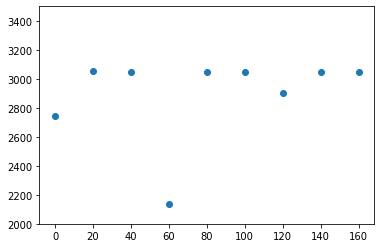

In [9]:
plt.scatter(angles, speeds)
plt.ylim(2000, 3500)

In [10]:
from sklearn import preprocessing
voltseries = pd.Series(voltages)

In [11]:
import numpy as np
vs_n = voltseries / np.linalg.norm(voltseries)

In [12]:
wavespeed_x = np.arange(2000, 3500, 1)

In [13]:
wavespeed_x

array([2000, 2001, 2002, ..., 3497, 3498, 3499])

In [14]:
amplitudes = test_collection.map_collections[0].waveforms[0][1].gaussian_model(wavespeed_x, 10, speeds[0], 10)

In [15]:
speeds[0]

2743.9024390243903

In [16]:
def triangular_distribution(_xdata, _center, _ampltiude=1):
    _plateau = 5   # "Flat Spot" in m/s around center frequency
    _ramp = 50   # Slope for intensity falloff
    _ydata = []
    for value in _xdata:
        if(value > _center):
            _point = -0.02*(value - _center) + 1.0
            if(_point < 0):
                _ydata.append(0)
            elif(_point > 1):
                _ydata.append(0)
            else:
                _ydata.append(_point)
        else:
            _point = 0.02*(value-(_center)) + 1.0
            if(_point < 0):
                _ydata.append(0)
            elif(_point > 1):
                _ydata.append(0)
            else:
                _ydata.append(_point)
    return _ydata


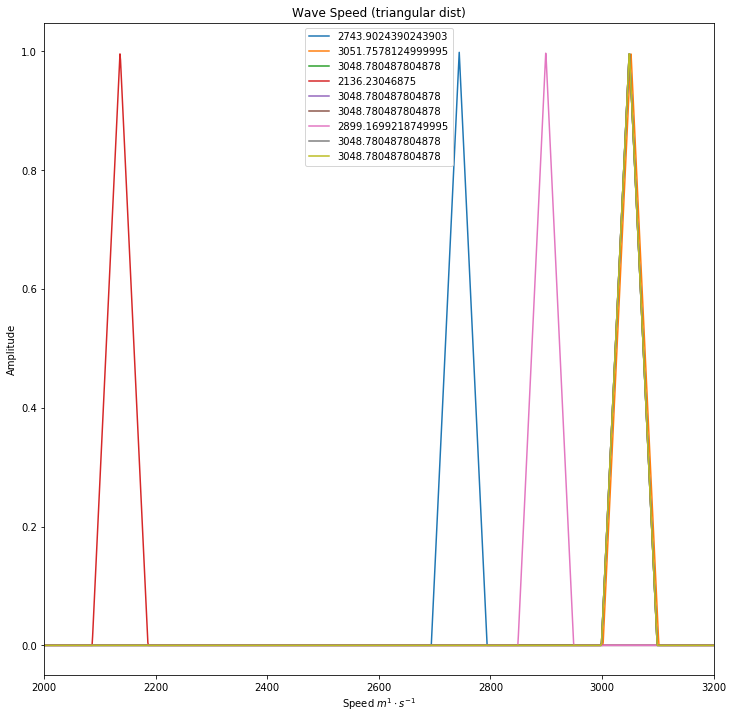

In [17]:
_testtriangle = []
plt.figure(figsize=[12,12])
plt.title("Wave Speed (triangular dist)")
plt.ylabel("Amplitude")
plt.xlabel("Speed $m^{1} \cdot s^{-1}$")
plt.xlim([2000, 3200])
for current in speeds:
    _testtriangle.append(triangular_distribution(wavespeed_x, current))
for current in _testtriangle:
    plt.plot(wavespeed_x, current)
plt.legend(speeds)

In [18]:
'''
Code to look up velocity and normalized values from a CSV based on XYZ imputs.
Notes:
    - ly use mode 1 from table
    First row is speed (mm/us) (need to convert to m/s)
    Second row is normalized (arbitrary units)
Need to return both back to main code
'''
import pandas as pd


def get_values(x, y, z):
    # Reads CSV
    file_name = r'C:\Users\tka\source\repos\data\TiAFWResult.csv'

    # I had to skip row 0 in the CSV due to how it was made.
    data = pd.read_csv(file_name, skiprows=[0], low_memory=False)
    columns = data.columns

    # converts CSV into floats
    for col in columns:
        data[col] = data[col].astype(float)

    # Searches dataframe for the x, y, and z variable. Only reports Mode 1 numbers
    velocity = data[(data['x'] == x) & (data['y'] == y) & (data['z'] == z) & (data['Mode'] == 1)]

    # changes units of velocity from mm/us to m/s
    velocity = velocity.mul([1000, 1], axis=0)

    # Returns the three generated arrays (all the same length)
    return velocity

In [19]:
truth_vals = get_values(0.2, 0.1, 0.1)

[]

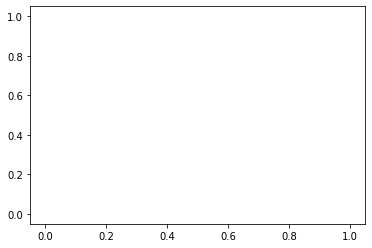

In [20]:
plt.plot()

In [21]:
truth_vals.loc[4:]

,x,y,z,Mode,0.000,1.000,2.000,3.000,4.000,5.000,...,171.000,172.000,173.000,174.000,175.000,176.000,177.000,178.000,179.000,Unnamed: 184
2302,200.0,100.0,100.0,1000.0,5113.000,5107.00,5092.000,5068.000,5036.000,4998.000,...,4848.0,4911.0,4974.0,5024.0,5087.0,5150.0,5060.000,5090.000,5107.00,NaN
2303,0.2,0.1,0.1,1.0,0.619,0.63,0.637,0.641,0.641,0.638,...,0.0,0.0,0.0,0.0,0.0,0.0,0.505,0.555,0.59,NaN


Text(0, 0.5, 'Normalized Ampltiude')

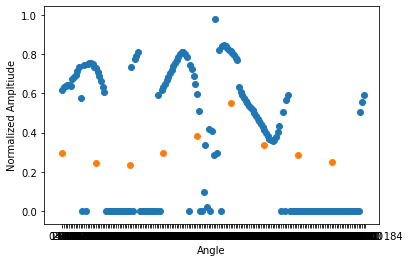

In [22]:
plt.scatter(truth_vals.columns[4:], truth_vals.iloc[1,4:])
plt.scatter([0, 20, 40, 60, 80, 100, 120, 140, 160], vs_n)
plt.xlabel("Angle")
plt.ylabel("Normalized Ampltiude")

In [23]:
test_df = pd.DataFrame(speeds, index=[angles])

In [24]:
for current in angles:
    print("{:.3f}".format(float(current)))


0.000
20.000
40.000
60.000
80.000
100.000
120.000
140.000
160.000


In [25]:
actualspeeds = []
actual_speeds = get_values(0.1, 0.2, 0.3)
for current in angles:
    actualspeeds.append(actual_speeds['{:.3f}'.format(float(current))])
actualspeeds = pd.DataFrame(actualspeeds)

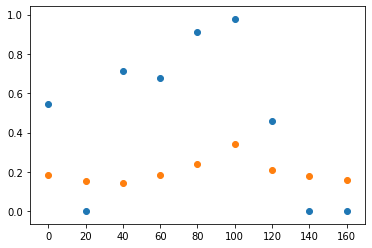

In [26]:
plt.scatter(angles,actualspeeds.iloc[:,1])
plt.scatter(angles, voltages)

In [27]:
xyplanes = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]
zplanes = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
speedlist = []
amplist = []
planelist = []
for x in xyplanes:
    for y in xyplanes:
        for z in zplanes:
            xf = float(x)
            yf = float(y)
            zf = float(z)
            entry = get_values(xf, yf, zf)
            amptemp = []
            speedtemp = []
            for current in angles:
                planelist.append([xf, yf, zf, current])
                speedtemp.append(entry['{:.3f}'.format(float(current))].iloc[0].tolist())
                amptemp.append(entry['{:.3f}'.format(float(current))].iloc[1].tolist())
            speedlist.append(speedtemp)
            amplist.append(amptemp)

KeyboardInterrupt: 

4161.000000000001

In [336]:
amplist[0]

[0.555, 0.0, 0.688, 0.65, 0.6609999999999999, 0.779, 0.45, 0.0, 0.0]

In [337]:
planelist.__len__()

5760

In [338]:
fitness_scores = []
for current in range(0, amplist.__len__()):
    _amplist_df = np.array(amplist[current])
    
    for currentangle in angles:
        _amplist_df = np.roll(_amplist_df, shift=1)
        fitness_scores.append(np.sum(vs_n + _amplist_df))

fitness_df = pd.DataFrame(fitness_scores)
_max_fitness_idx = fitness_df.idxmax()
_max_fitness = fitness_df.iloc[_max_fitness_idx]
_min_fitness_idx = fitness_df.idxmin()
_min_fitness = fitness_df.iloc[_min_fitness_idx]
print("Max Fitness Value: {0} at index {1}".format(_max_fitness, _max_fitness_idx))


Max Fitness Value:              0
4549  8.999767 at index 0    4549
dtype: int64


[0.7, 0.3, 0.6, '80']

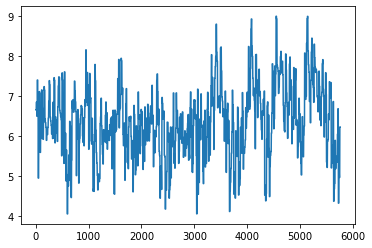

In [339]:
plt.plot(fitness_df)
planelist[4549]

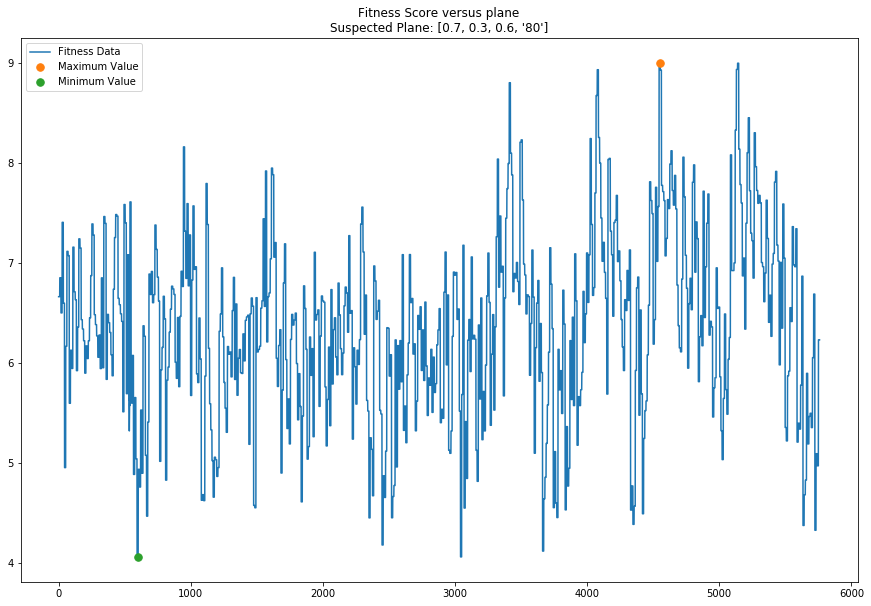

In [340]:
plt.figure(figsize=[15, 10])
plt.plot(fitness_scores)
plt.plot(int(_max_fitness_idx[0]), float(_max_fitness[0]), '.', markersize=15)
plt.plot(int(_min_fitness_idx[0]), float(_min_fitness[0]), '.', markersize=15)
plt.title("Fitness Score versus plane\n" + "Suspected Plane: {0}".format(planelist[int(_max_fitness_idx[0])]))
plt.legend(['Fitness Data', 'Maximum Value', 'Minimum Value'])

In [341]:
_position = int(_max_fitness_idx[0])
_ampdata = get_values(planelist[_position][0], planelist[_position][1], planelist[_position][2])
_ampvangle = []
_spdvangle = []
for current in angles:
    speed, amplitude = _ampdata["{:.3f}".format(int(current))].values.tolist()
    _ampvangle.append(amplitude)
    _spdvangle.append(speed)

In [342]:
_ampdata['20.000'].values.tolist()

[3606.0000000000005, 0.813]

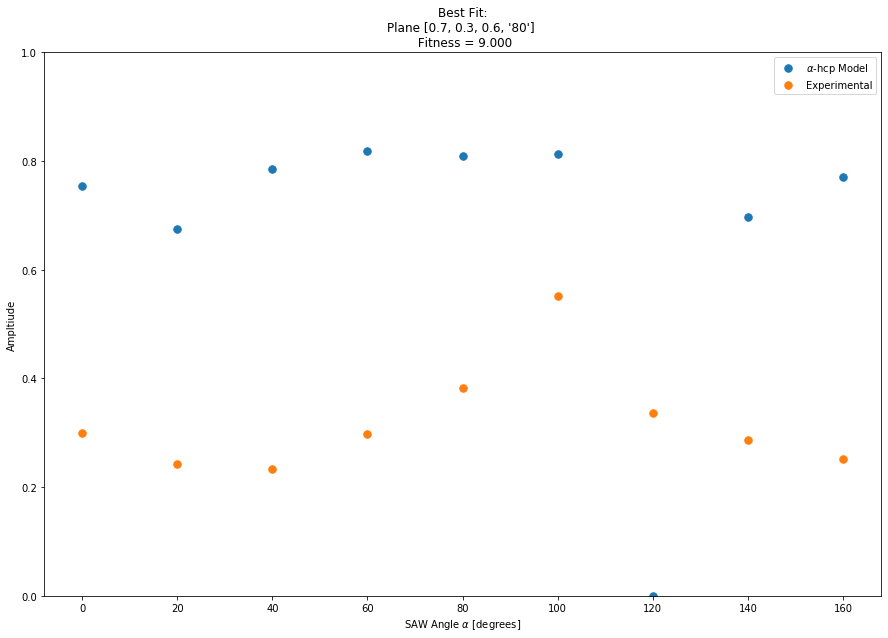

In [377]:
plt.figure(figsize=[15, 10])
_ampvangle = np.roll(_ampvangle, int(80/20))
plt.title("Best Fit:\n"+"Plane {0} \n Fitness = {1:.3f}".format(planelist[int(_max_fitness_idx[0])], float(_max_fitness[0])))
plt.plot(angles, _ampvangle, '.', markersize=15)
plt.plot(angles, vs_n, '.', markersize=15)
plt.xlabel(r"SAW Angle $\alpha$ [degrees]")
plt.ylabel("Ampltiude")
plt.ylim([0.0, 1.0])
plt.legend([r"$\alpha$-hcp Model", "Experimental"])

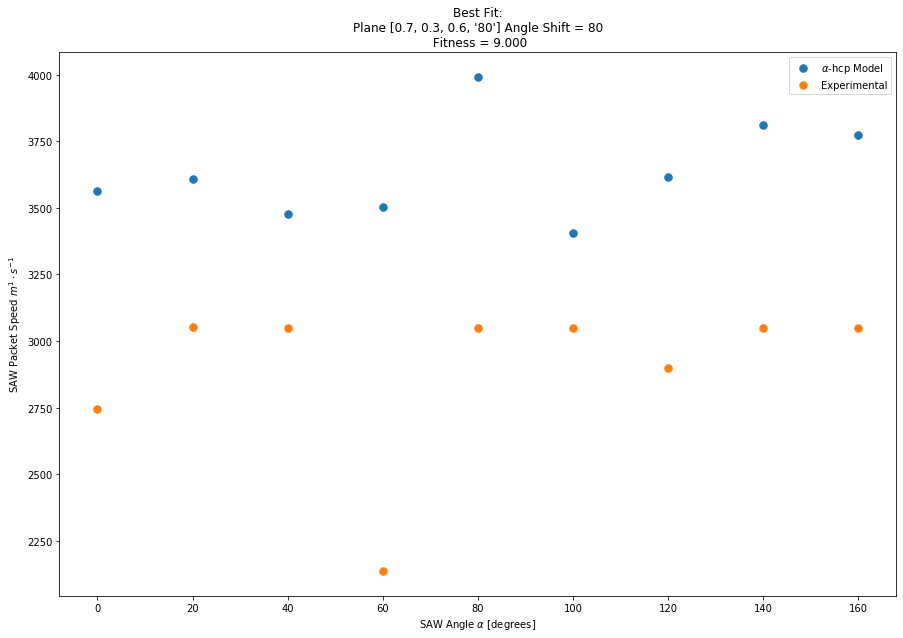

In [359]:
plt.figure(figsize=[15, 10])
plt.title("Best Fit:\n"+"Plane {0} Angle Shift = {1}\n Fitness = {2:.3f}".format(planelist[int(_max_fitness_idx[0])], int(planelist[int(_max_fitness_idx[0])][3]), float(_max_fitness[0])))
plt.plot(angles, _spdvangle, '.', markersize=15)
plt.plot(angles, speeds, '.', markersize=15)
plt.xlabel(r"SAW Angle $\alpha$ [degrees]")
plt.ylabel(r"SAW Packet Speed $m^{1} \cdot s^{-1}$")
plt.legend([r"$\alpha$-hcp Model", "Experimental"])

In [365]:
_minposition = _position = int(_min_fitness_idx[0])
_ampdatamin = get_values(planelist[_position][0], planelist[_position][1], planelist[_position][2])
_ampvanglemin = []
_spdvanglemin = []
for current in angles:
    speed, amplitude = _ampdatamin["{:.3f}".format(int(current))].values.tolist()
    _ampvanglemin.append(amplitude)
    _spdvanglemin.append(speed)

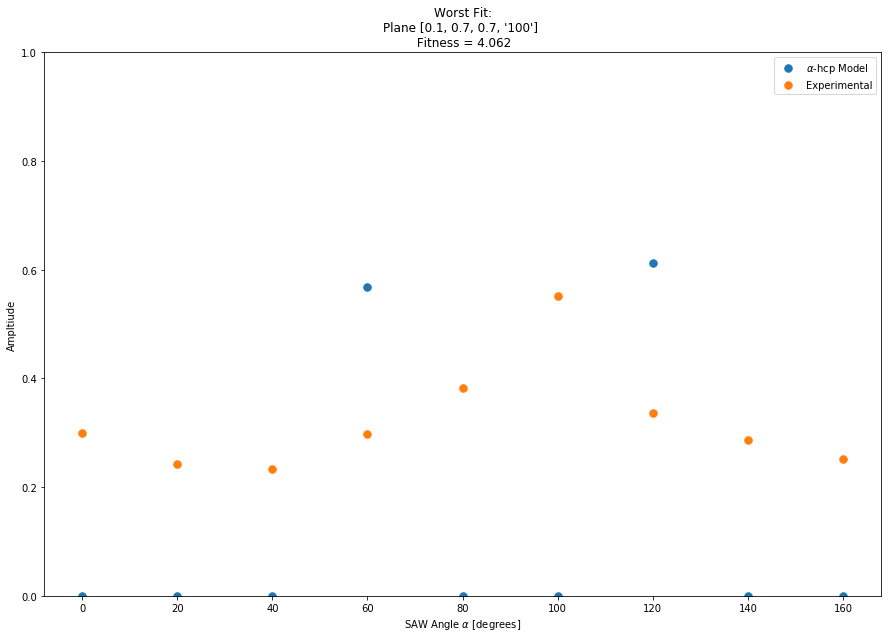

In [376]:

plt.figure(figsize=[15, 10])
_avamin = np.array(_ampvanglemin)
_avamin = np.roll(_avamin, int(100/20))
plt.title("Worst Fit:\n"+"Plane {0} \n Fitness = {1:.3f}".format(planelist[int(_min_fitness_idx[0])], float(_min_fitness[0])))
plt.plot(angles, _ampvanglemin, '.', markersize=15)
plt.plot(angles, vs_n, '.', markersize=15)
plt.xlabel(r"SAW Angle $\alpha$ [degrees]")
plt.ylabel("Ampltiude")
plt.ylim([0.0, 1.0])
plt.legend([r"$\alpha$-hcp Model", "Experimental"])

In [422]:
ipfimage = []
for currentrow in range(0, 11):
    temprow = []
    for currentpixel in range(0,3061):
        fitness_scores = []
        amps = []
        spds = []
        print("Row {0} Pixel {1}".format(currentrow, currentpixel))
        for current_map in range(0, test_collection.map_collections.__len__()):
            amps.append(test_collection.map_collections[current_map].rf_voltagemap.iloc[currentrow, currentpixel])
            spds.append(test_collection.map_collections[current_map].velocity_map.iloc[currentrow, currentpixel])
            ampsnp = np.array(amps)
            spdsnp = np.array(spds)
            _tmpfit = []
        print("Amps: " + amps.__str__())
        fitness = []
        for current_model_index in range(0, amplist.__len__()):                
            _currentmodelamps = np.array(amplist[current_model_index])
            _currentmodelamps = np.nan_to_num(_currentmodelamps)
            fitness.append(np.sum(_currentmodelamps + ampsnp))
           # print("Amps: " + amps.__str__())
            #print("Model Amps: " + _currentmodelamps.__str__())
            #print("Fitness: {0}".format(fitness[-1]))
        fitness = np.array(fitness)
        max_fitness = fitness.max()
        max_fitness_idx = fitness.argmax()
        print("Max Fitness {0} at {1}".format(max_fitness, max_fitness_idx))
                

Row 0 Pixel 0
Amps: [0.07, 0.07, 0.06, 0.06, 0.06, 0.06, 0.06, 0.07, 0.06]
Max Fitness 6.689 at 505
Row 0 Pixel 1
Amps: [0.06, 0.07, 0.06, 0.07, 0.07, 0.05, 0.05, 0.06, 0.08]
Max Fitness 6.689 at 505
Row 0 Pixel 2
Amps: [0.06, 0.07, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.08]
Max Fitness 6.689 at 505
Row 0 Pixel 3
Amps: [0.07, 0.07, 0.06, 0.06, 0.06, 0.08, 0.08, 0.06, 0.08]
Max Fitness 6.739 at 505
Row 0 Pixel 4
Amps: [0.07, 0.09, 0.05, 0.06, 0.05, 0.06, 0.05, 0.06, 0.07]
Max Fitness 6.679 at 505
Row 0 Pixel 5
Amps: [0.05, 0.07, 0.06, 0.07, 0.05, 0.06, 0.06, 0.06, 0.07]
Max Fitness 6.669 at 505
Row 0 Pixel 6
Amps: [0.05, 0.06, 0.07, 0.05, 0.06, 0.05, 0.06, 0.06, 0.06]
Max Fitness 6.639 at 505
Row 0 Pixel 7
Amps: [0.07, 0.04, 0.05, 0.06, 0.07, 0.05, 0.06, 0.06, 0.07]
Max Fitness 6.649000000000001 at 505
Row 0 Pixel 8
Amps: [0.06, 0.06, 0.05, 0.05, 0.05, 0.05, 0.09, 0.07, 0.05]
Max Fitness 6.649000000000001 at 505
Row 0 Pixel 9
Amps: [0.06, 0.06, 0.07, 0.04, 0.05, 0.05, 0.06, 0.05, 0.06]
M

KeyboardInterrupt: 

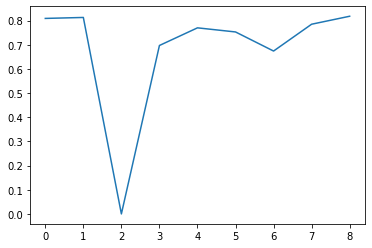

In [425]:
plt.plot(amplist[505])

In [ ]:
fitness_scores = []
for current in range(0, amplist.__len__()):
    _amplist_df = np.array(amplist[current])
    
    for currentangle in angles:
        _amplist_df = np.roll(_amplist_df, shift=1)
        fitness_scores.append(np.sum(vs_n + _amplist_df))

fitness_df = pd.DataFrame(fitness_scores)
_max_fitness_idx = fitness_df.idxmax()
_max_fitness = fitness_df.iloc[_max_fitness_idx]
_min_fitness_idx = fitness_df.idxmin()
_min_fitness = fitness_df.iloc[_min_fitness_idx]
print("Max Fitness Value: {0} at index {1}".format(_max_fitness, _max_fitness_idx))
_position = int(_max_fitness_idx[0])
_ampdata = get_values(planelist[_position][0], planelist[_position][1], planelist[_position][2])
_ampvangle = []
_spdvangle = []
for current in angles:
    speed, amplitude = _ampdata["{:.3f}".format(int(current))].values.tolist()
    _ampvangle.append(amplitude)
    _spdvangle.append(speed)